# Avocado Project

Project description:
    
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


## In this problem we need to apply two algorithms i.e. classification and regression.

### Importing Libraries

In [1]:
# importing required libraries
import pandas as pd  # for dataframe and visualisation
import numpy as np   # to handle arrays and do mathematical operations
import matplotlib.pyplot as plt  # for data visualisation
import seaborn as sns    # for data visualisation
import warnings  # for unnecessary warnings
warnings.filterwarnings('ignore')  # this will ignore the unnecessary warnings

In [2]:
# loading the dataframe
avocado = pd.read_csv(r"C:\Users\sonus\Downloads\avocado.csv\avocado.csv")

#### First we will do the classification problem and for this problem our target column is region.

### Data Analysis

In [3]:
# let's check the shape of our data
avocado.shape

(18249, 14)

The data has 18249 rows and 14 columns.

In [4]:
# let's load top 10 rows of data to take a overview of it
avocado.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [5]:
# checking all the column names
columns = avocado.columns
columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

#### Data Type

In [6]:
# Let's check the data types of each columns
dt = avocado.dtypes
dt

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

From here we can see most of the columns contains float data type i.e. numerical data type but some columns contains object data type. We will handle them in feature engineering.

#### Null Values

In [7]:
# let's check if dataset contains any null values
null = avocado.isnull().sum()
null

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Here we can see it is showing there is no any null value in the dataset but is it really true.

As we have seen the dataset have some columns which contains object data type so let's cross check the dataset for null values.

In [8]:
obj = ['Date','type','region']
# as there are only three columns have the object data type so making a list of those columns

# now we will check for any white spaces in that columns as the white space shows the object data type but there is not any data
# are associated with them to show. so, we can see them as null values. 

# let's check for the white space
for i in obj:
    df = avocado.loc[avocado[i] == ' ']
    print(df, '\n')

Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: [] 

Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: [] 

Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: [] 



From the above observation we can see that there is not any white spaces too in the dataset so now we can say it that there is not any null value present in the dataset.

#### Unique Categorical Features

In [9]:
# let's check how many unique values are present the categorical data columns

# we will use for loop to check this as we have already created a list of our categorical column
for i in obj:
    uni = avocado[i].nunique()
    print('There are', uni, 'unique values are present in', i, 'column.')

There are 169 unique values are present in Date column.
There are 2 unique values are present in type column.
There are 54 unique values are present in region column.


Here we can observe that Date and region column contains large number of unique values.

#### Statistical summary

In [10]:
# let's check the statistical summary of all numeric column data
summary = avocado.describe()
summary

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Here we can see most of data is showing into numpy array format and from this we will not be able to collect much more information so, we will try some different analysis or visualisation to gather as much information as we can from our data.

#### Skewness

In [11]:
skew = avocado.skew()
skew

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

From here we can see most of the columns shows high positive skewness is it true? We will check it further in visualisation part by seeing the distribution of our data.

### Data Visualisation

#### Distribution of Data

Let's check the distribution of all numeric data.

In [12]:
# first we will create a list of all numeric data type column

# we will use list concatenation to create the list where it will take all numeric data type from dataset.columns (not object)
num_col = [i for i in avocado.columns if avocado[i].dtypes != 'O']

In [13]:
# let's check whethere it is correct or not
num_col

['Unnamed: 0',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

Here we can see in this list there is no Date, type and region which contains object data type.

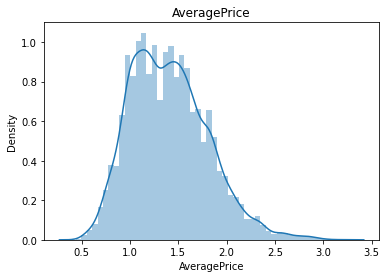

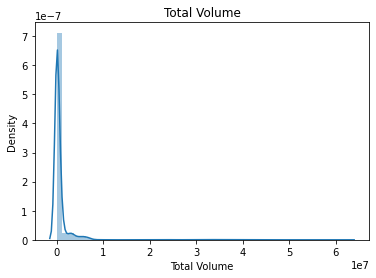

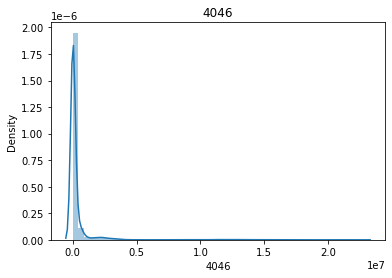

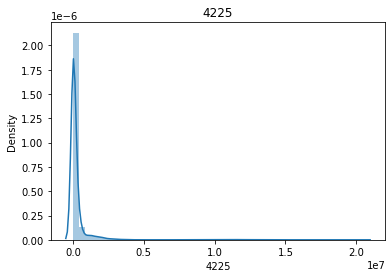

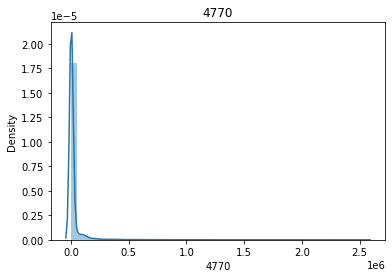

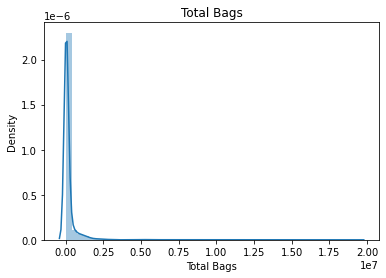

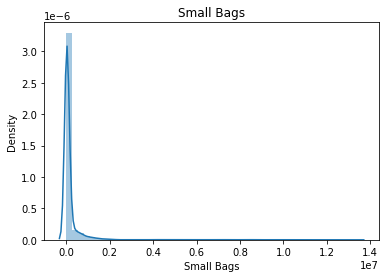

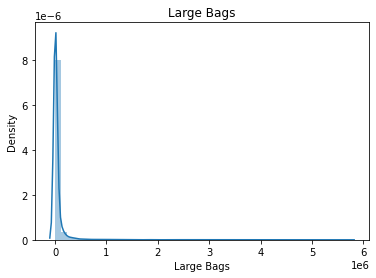

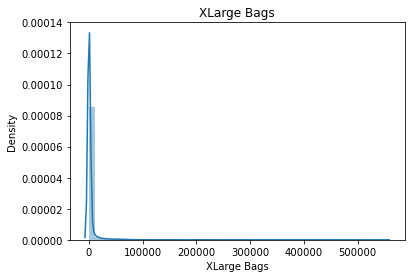

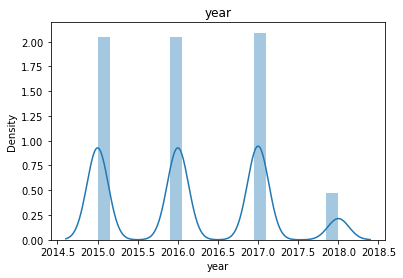

In [14]:
# now we can check the distribution of data

# we will use distplot for this
# we will use for loop to plot all variables graph
for i in num_col[1:]:
# here we have taken num_col[1:] starting from index value 1 because at index 0 it is just the serial number and there is no
# use of that column we will drop that column in the feature engineering part
    plt.title(i)
    sns.distplot(avocado[i], kde = True)
    plt.show()

Observation:
    
    By observing these plots we can see that all the variables except Average Price and year have highly right skewed data.
    We need to handle them.

#### Outliers

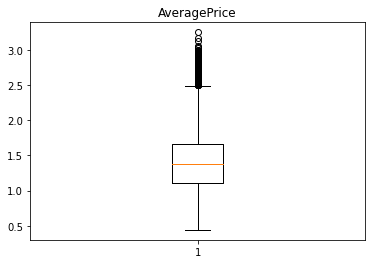

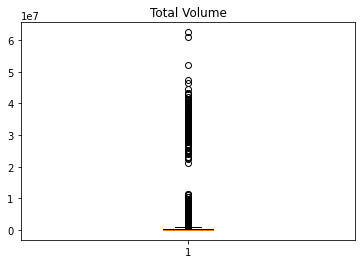

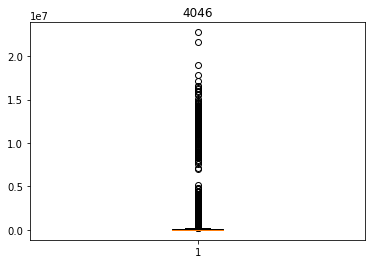

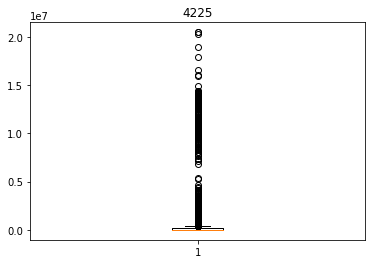

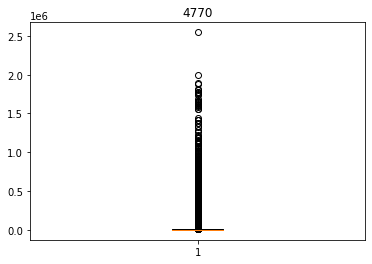

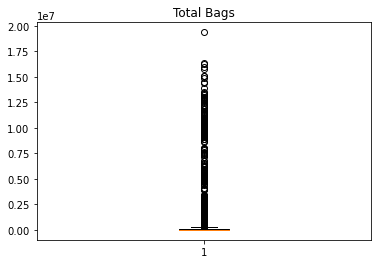

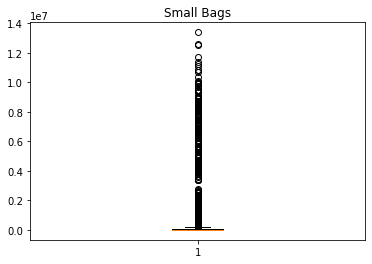

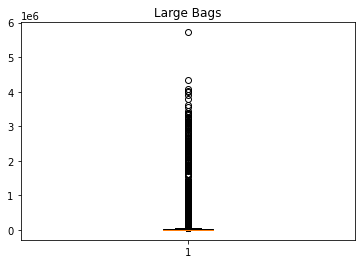

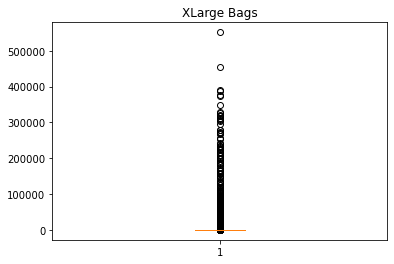

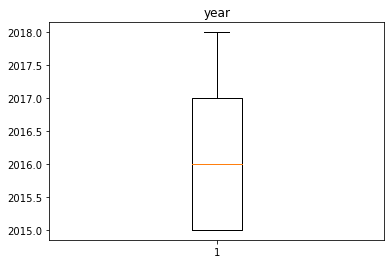

In [15]:
# we will use for loop to check outliers
for i in num_col[1:]:
    plt.title(i)
    plt.boxplot(avocado[i])
    plt.show()

Observation:
    
    By plotting boxplot we can see every column contains huge number of outliers but is it really true?
    We will check it in feature engineering part and handle them.

#### Correlation

<AxesSubplot:>

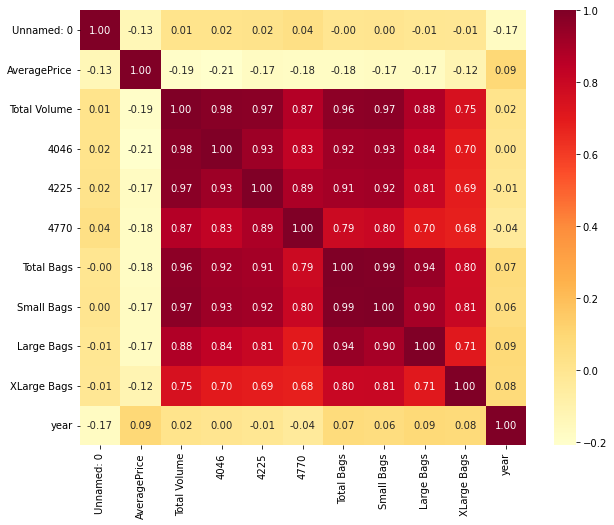

In [16]:
# let's check correlation of independent with other independent variables to check whether multicollinearity exist
corr = avocado.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = 'YlOrRd', annot = True, fmt = '.2f')

Observations:
    
    1: Here darker shades shows higher correlation.
    2: There is very high correlation between Total Volume and 4046 column.
    3: There is very high correlation between Total bags and small bags.
    4: Certain other columns exist which have high collinearity with other independent variable.
    5: From above observation we can say that there is multicollinearity exist in the dataset.

<AxesSubplot:xlabel='count', ylabel='region'>

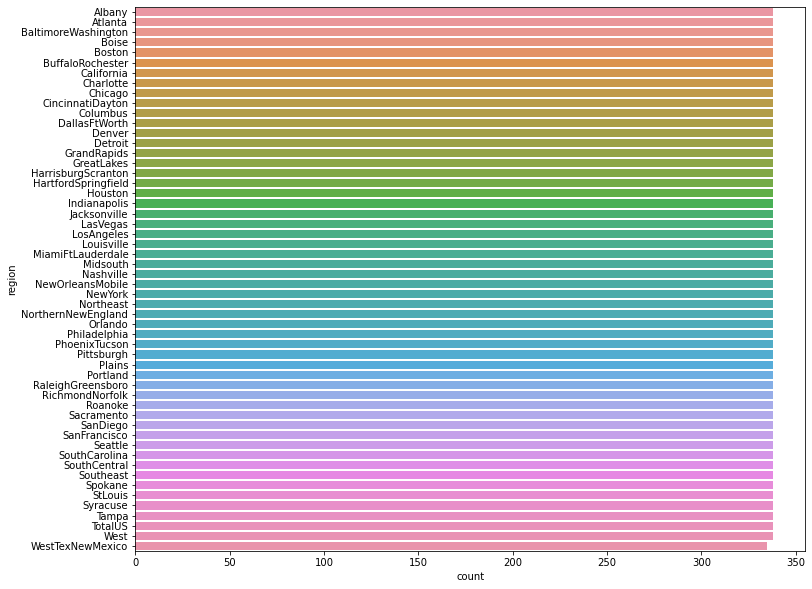

In [17]:
# Categorical variable visualisation
plt.figure(figsize = (12,10))
sns.countplot(y = avocado['region'])

<AxesSubplot:xlabel='type', ylabel='count'>

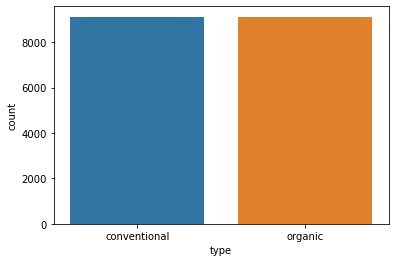

In [18]:
sns.countplot(avocado['type'])

From here we can see there are almost same number of data present from every region and of every type of avocado

#### Relation between target with numerical independent variable

Relation between AveragePrice and region


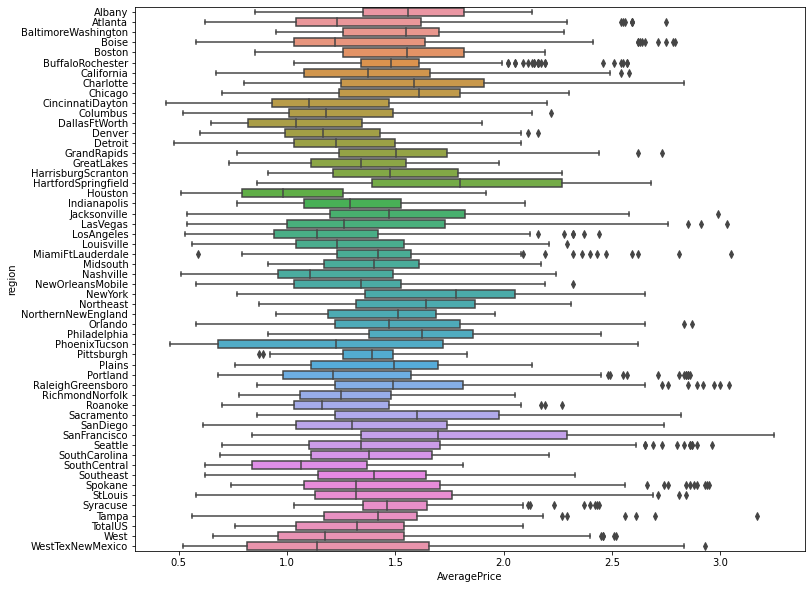

Relation between Total Volume and region


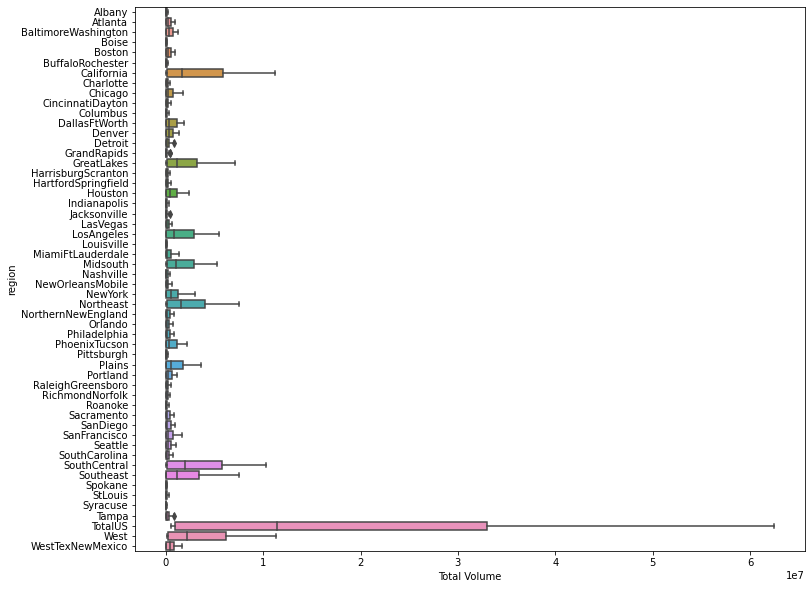

Relation between 4046 and region


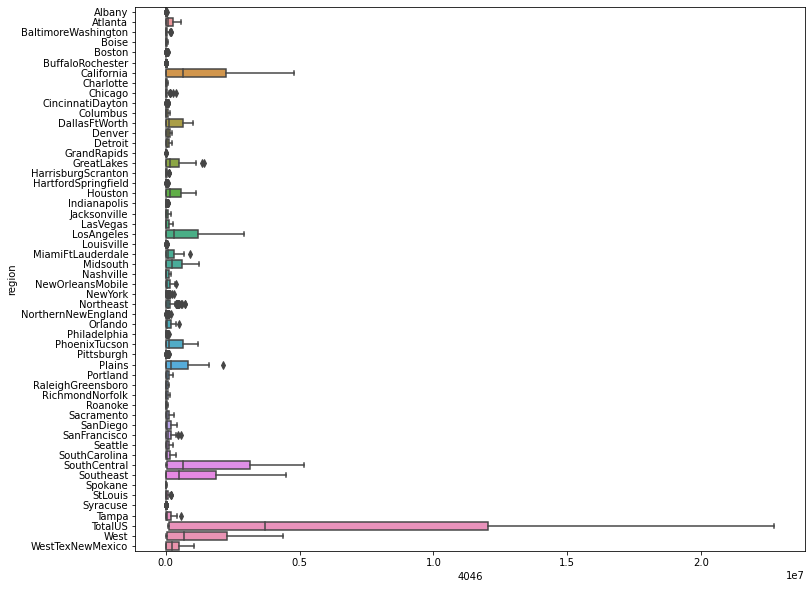

Relation between 4225 and region


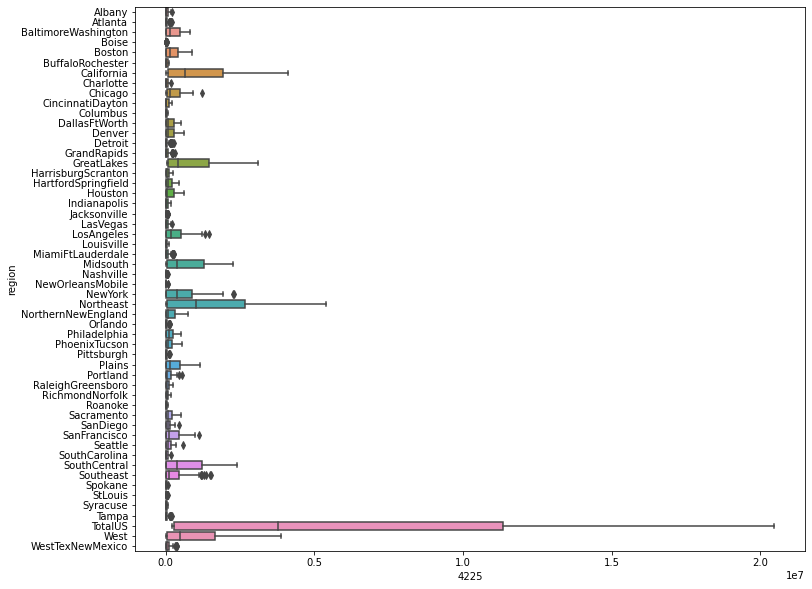

Relation between 4770 and region


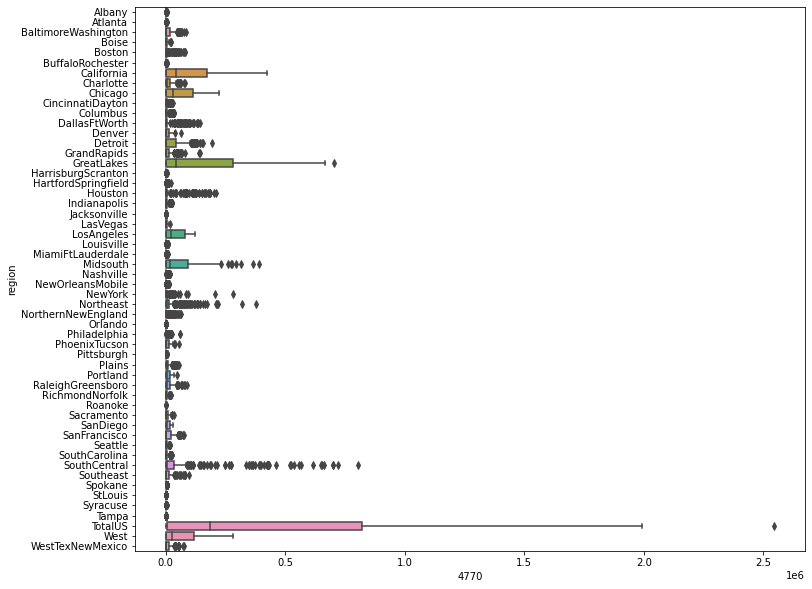

Relation between Total Bags and region


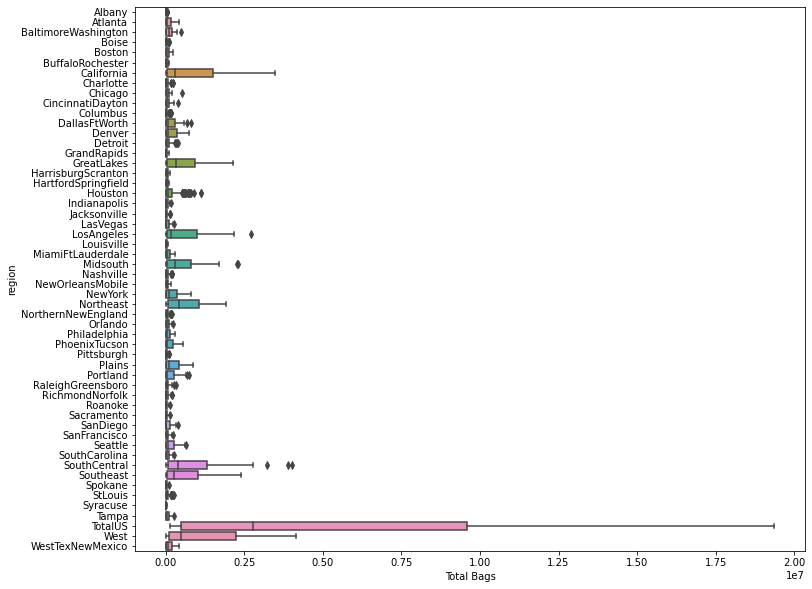

Relation between Small Bags and region


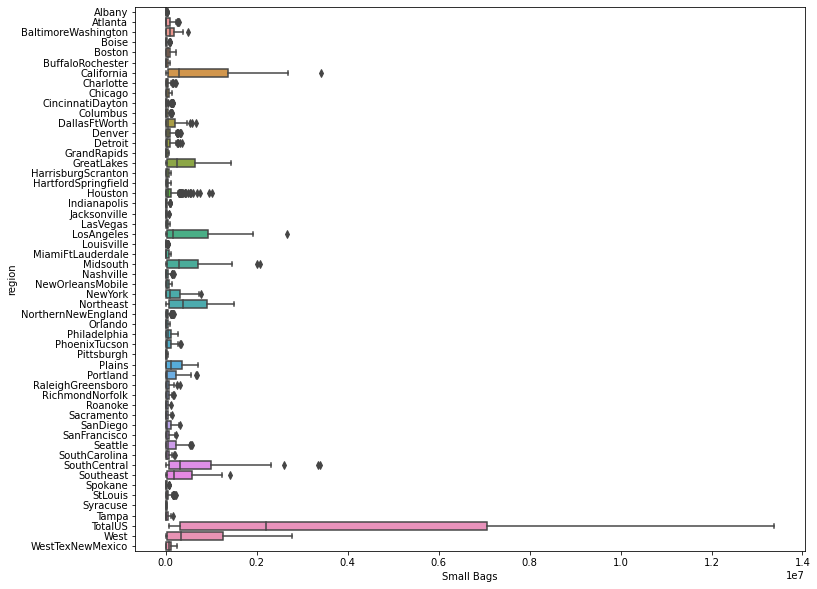

Relation between Large Bags and region


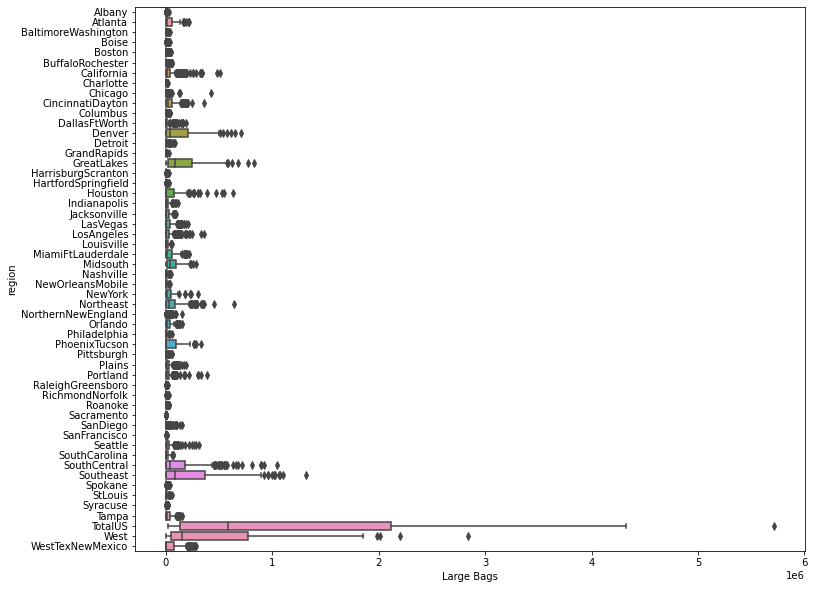

Relation between XLarge Bags and region


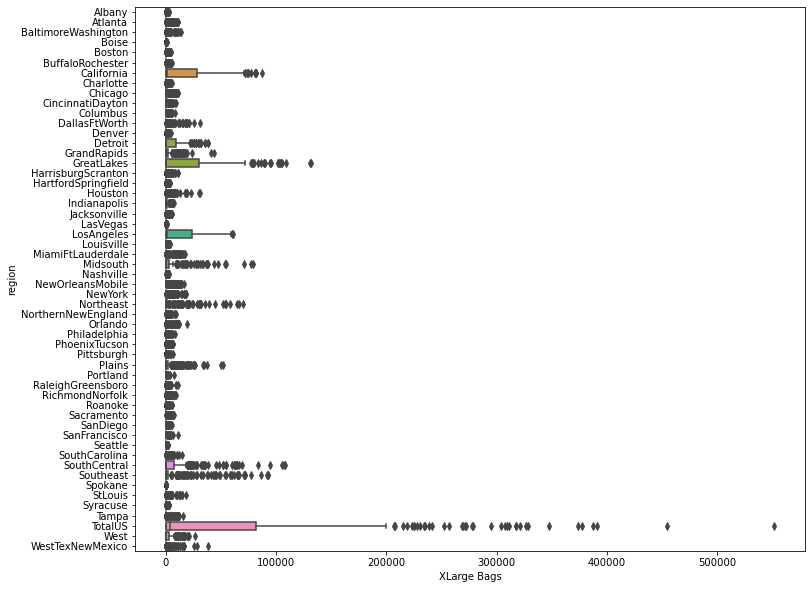

Relation between year and region


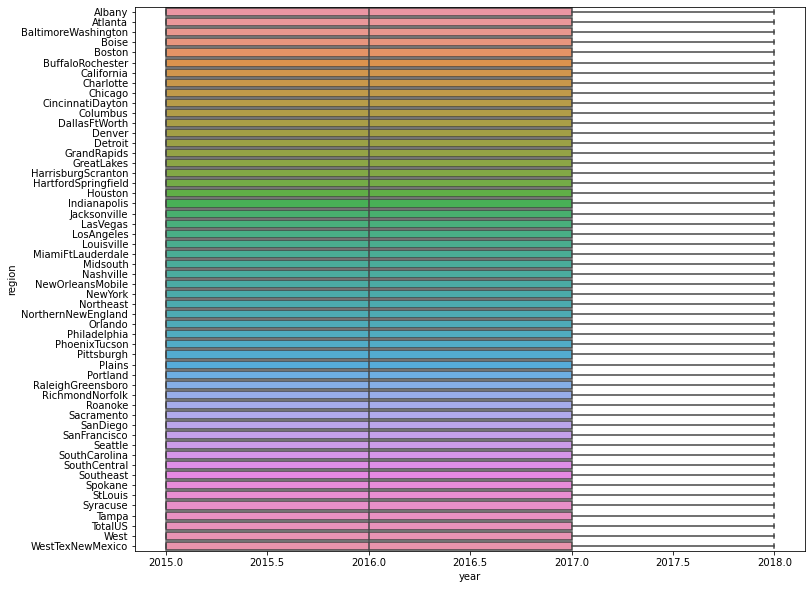

In [19]:
# we will use box plot to show this data
# we will use for loop to plot all graphs
for i in num_col[1:]:
    print('Relation between', i, 'and region')
    plt.figure(figsize = (12,10))
    sns.boxplot(x = avocado[i], y = avocado['region'])
    plt.show()

Observations:
    
    1: The average price of avocado in every region lies between 1.0 to approximate 1.7.
    2: The total volume i.e.total number of avocados sold in every region are somewhere similar but in TotalUS region
       avocados maximum number of avocados are sold.
    3: The total number of avocados sold with PLU 4046, 4225, and 4770 are much higher in TotalUS region.
    4: There are quite outliers present in Large Bags and XLarge Bags columns in different regions.
    5: There is linear relationship between year and region.

#### Relation between two independent variables

[]

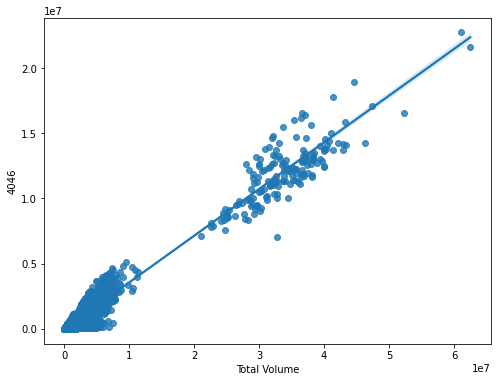

In [20]:
# as we have seen multicollinearity let's visualise it and check once again
plt.figure(figsize = (8, 6))
sns.regplot(avocado['Total Volume'], avocado['4046'])
plt.plot()

[]

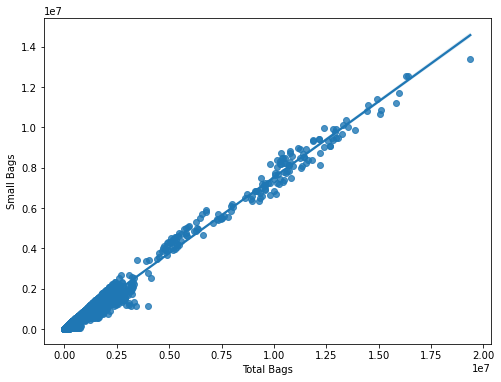

In [21]:
plt.figure(figsize = (8, 6))
sns.regplot(avocado['Total Bags'], avocado['Small Bags'])
plt.plot()

In this observation we can see as total bags increases number of small bags also increases

### Feature Engineering

In [22]:
# first let's make a copy of our dataset and we will perform all feature engineering part in this dataset
avocado_copy = avocado.copy()

In [23]:
# as our dataset contains a column which contains datetime type data but it is showing object type so converting it
avocado_copy['Date'] = pd.to_datetime(avocado['Date'])

In [24]:
# checking types of data
avocado_copy.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

Here we can see now our data is converted into datetime type data

<AxesSubplot:xlabel='Date', ylabel='region'>

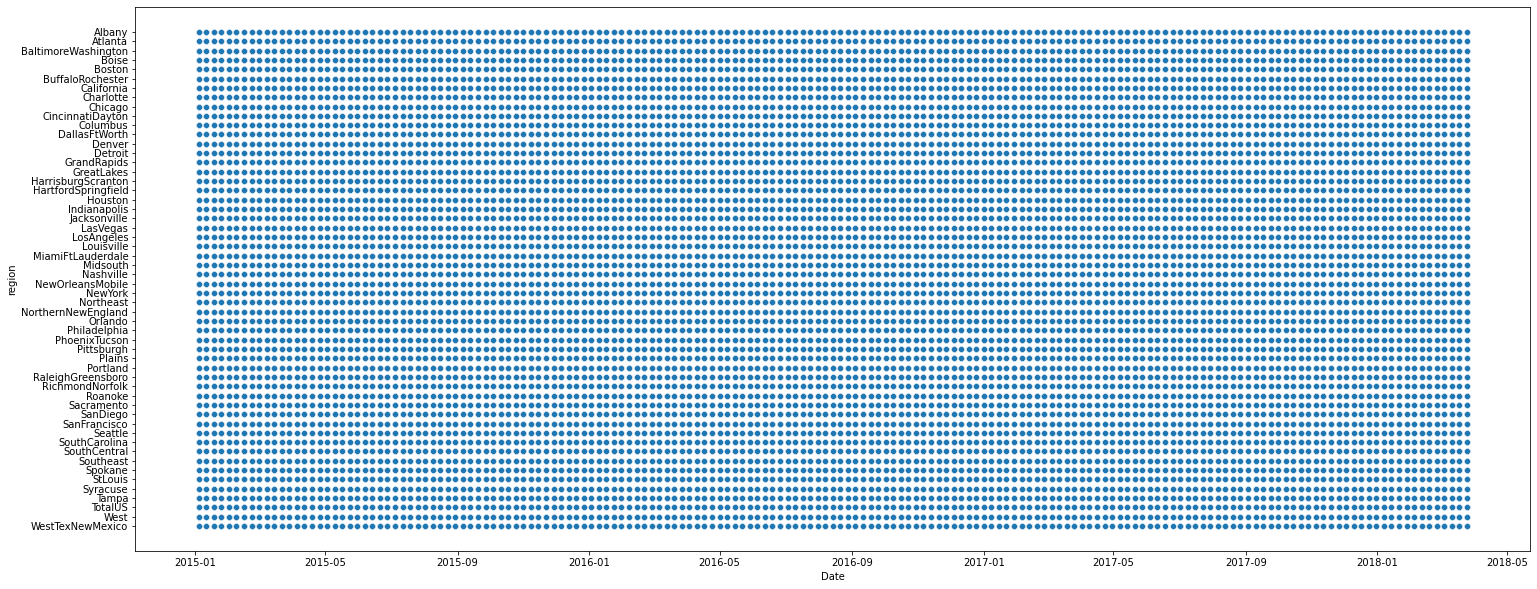

In [25]:
# checking relation between date and region
plt.figure(figsize = (25, 10))
sns.scatterplot(avocado_copy['Date'], avocado_copy['region'])

Here we can see it is showing linear relation with region. As it is not providing much more information or weightage to predict the output we can drop it.

#### Dropping columns


In [26]:
avocado_copy.drop('Unnamed: 0', axis = 1, inplace = True)
avocado_copy.drop('Date', axis = 1, inplace = True)

In [27]:
# as we have already seen there is linear relationship between year and region column and it is not providing much more 
# information to predict the output so we will also drop that column
avocado_copy.drop('year', axis = 1, inplace = True)

In [28]:
# checking shape of dataframe
avocado_copy.shape

(18249, 11)

Now our three columns are dropped.

#### Encoding

To send our data into model we need to convert it into numeric data type for that we will use encoding technique LabelEncoder as our target column contains more than 2 unique values.

In [29]:
# checking columns with object data types
avocado_copy.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
region           object
dtype: object

In [30]:
# importing library
from sklearn.preprocessing import LabelEncoder

In [31]:
# making instance of it
le = LabelEncoder()

In [32]:
# sending data for encoding
avocado_copy['type'] = le.fit_transform(avocado_copy['type'])
avocado_copy['region'] = le.fit_transform(avocado_copy['region'])

Now our data is encoded

In [33]:
# checking it
avocado_copy.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
region            int32
dtype: object

Here we can see our all data is now numeric type

#### Outliers

In [34]:
# importing required library to calculate z score for handling outliers
from scipy.stats import zscore

In [36]:
# checking zscore value of every input data
zsc = np.abs(zscore(avocado_copy))
zsc.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,0.999836,1.700252
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,0.999836,1.700252
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,0.999836,1.700252
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,0.999836,1.700252
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,0.999836,1.700252


Here it is showing zscore values of all data

In [37]:
# checking for other columns where zscore value is greater than 3 standard deviation
threshold = 3
np.where(zsc>threshold)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

Here it is showing the rows and column index whose zscore value is greater than 3

In [38]:
# storing all values which have standard deviation less than 3 into another variable i.e. we are removing outliers
newdf = avocado_copy[(zsc<threshold).all(axis = 1)]

In [39]:
# checking shape of new data
newdf.shape

(17651, 11)

In [40]:
# Checking shape of old data
avocado_copy.shape

(18249, 11)

Here we can see the shape is reduced of dataset. There are around 600 rows are dropped. It is quite huge number so we will check the data loss.

In [41]:
# checking data loss
data_loss = (((18249-17651)/18249)*100)
data_loss

3.276891884486821

Here we can see there is around 3% data loss and as our dataset is big so it can be acceptble and we will go with this.

#### Distribution of Data

In [42]:
# first let's split input data and target data
x = newdf.iloc[ : , :-1]
y = newdf.iloc[ : , -1]

In [43]:
# As we have seen most columns have skewed data so handling them using log normal distribution
# let's make a list of all columns which have skewed data
data = x.iloc[ : , 1:-1]
# here as we have seen at 0 index is average price and at -1 index is type where average price is normally distributed
# while we have encoded the type so we don't need to make them as normal distribution so we have taken all other numeric columns
# except those two

In [44]:
# we will use for loop to make them in log normal distributin
for i in data:
    x[i] = np.log(x[i])

In [45]:
# lets check some rows
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,11.070329,6.943836,10.905127,3.874529,9.070718,9.059938,4.535284,-inf,0
1,1.35,10.912849,6.513645,10.706359,4.066117,9.159632,9.149323,4.579750,-inf,0
2,0.93,11.680304,6.677965,11.600475,4.871373,9.005202,8.992459,4.636087,-inf,0
3,1.08,11.277104,7.031741,11.184094,4.284689,8.667535,8.644249,4.896047,-inf,0
4,1.28,10.840357,6.847453,10.688265,4.327834,8.729713,8.697222,5.286700,-inf,0


Here we can see now it is in log normal distribution.

Here we can see after making data into log normal distribution our XLarge Bags Column gets infinity value we need to handle them.

In [46]:
# here we have replace the infinity values using the maximum values of the data
x[np.isinf(x)] = np.nanmax(x)

#### Scaling the data

As our data is not on same scale because of that our model may not train properly so we need to scale the input data

In [47]:
# we will use Standard Scaler scaler to scale our input data

# importing required library
from sklearn.preprocessing import StandardScaler

In [48]:
# making instance of it
s_sc = StandardScaler()

In [49]:
# sending input data for scaling and holding the scaled data into another variable
stand = s_sc.fit_transform(x)

In [50]:
# now our data is scaled but it is in numpy array format so putting it into dataframe
x_in = pd.DataFrame(stand)

It has converted all the data into same scale where the mean becomes 0 and standard deviation is 1.

#### Multicollinearity

As we have seen there is multicollinearity exist in certain columns so we will check them and try to handle that.

In [51]:
# let's check vif value so that we can see which column is giving more weightage to predict the output.
# importing library to calculate VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
# we will make a user defined function and use for loop to pass one by one column of input data to calculate vif value
def vif_val():
    vif = pd.DataFrame()
    # here we have made an empty dataframe with name vif
    
    vif['VIF Factor'] = [variance_inflation_factor(x_in.values,i) for i in range(x_in.shape[1])]
    # it will calculate the vif value of every column of input data and add it into the empty dataframe column VIF Factor
    # here x_in.shape[1] is given so that it will calculate vif value of columns
    # with the help of vif values we will be able to understand that which column data is providing more weightage to the output
    # so we can drop one or two columns with multicollinearity between them.
    
    vif['Features'] = x_in.columns
    # this will add a new column named Features into the dataset
    
    print(vif)
    # printing the dataframe to check the VIF values of different columns of input data.

In [53]:
# checking vif values of different columns
vif_val()

   VIF Factor  Features
0    1.868921         0
1   23.827646         1
2    2.935965         2
3    5.569331         3
4    1.220854         4
5   10.477427         5
6    4.317975         6
7    1.041837         7
8    1.716863         8
9    3.853199         9


As we have seen that Total Volume column have high collinearity with 4046 and similarly Total Bags having high collinearity with Small Bags.

And here we can see that from them Total volumn and Total Bags are providing more weightage to the predict the output so we will drop these columns.

In [54]:
# Now we will drop columns whose index are 2 and 6 from dataframe x_in
x_in.drop(2, axis = 1, inplace = True)
x_in.drop(6, axis = 1, inplace = True)

### Now our data is ready to go for training

### Data Splitting and Model Training

In [79]:
# first we will import library to split data and models to train them
from sklearn.model_selection import train_test_split

# As we know it is multiclass classification problem so we will import 4 classification model and train them
# from that we will choose best model
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Importing metrics to evaluate model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [80]:
# making instance of models
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
svc = SVC()

In [77]:
# first we will split our model at best random state
# we will use for loop for that and one model
for i in range(40, 61):
    x_train, x_test, y_train, y_test, = train_test_split(x_in, y, test_size = 0.25, random_state = i)
    # we will take 25% data for testing and rest 75% data for training of our model
    
    # sending data to decision tree classifier model for training
    knn.fit(x_train, y_train)
    
    # making predictions of test data
    pr_tr = knn.predict(x_train)
    
    # making prediction of train data
    pr_ts = knn.predict(x_test)
    
    # checking accuracy score of training and testing
    tr_ac = accuracy_score(y_train, pr_tr)
    ts_ac = accuracy_score(y_test, pr_ts)
    print('At random state', i, 'training accuracy is:', tr_ac, 'and testing accuracy is:', ts_ac,'\n')  

At random state 40 training accuracy is: 0.8378909200785617 and testing accuracy is: 0.740765918876048 

At random state 41 training accuracy is: 0.8375887596313643 and testing accuracy is: 0.7452979832313619 

At random state 42 training accuracy is: 0.8369844387369694 and testing accuracy is: 0.7317017901654204 

At random state 43 training accuracy is: 0.8400060432089439 and testing accuracy is: 0.7258101065035123 

At random state 44 training accuracy is: 0.8378153799667624 and testing accuracy is: 0.7394062995694539 

At random state 45 training accuracy is: 0.8365311980661732 and testing accuracy is: 0.7380466802628597 

At random state 46 training accuracy is: 0.8373621392959661 and testing accuracy is: 0.740086109222751 

At random state 47 training accuracy is: 0.839401722314549 and testing accuracy is: 0.7394062995694539 

At random state 48 training accuracy is: 0.837966460190361 and testing accuracy is: 0.7412191253115794 

At random state 49 training accuracy is: 0.8324520

From here we can there is not very much difference in training and testing accuracy at different random states.

In [58]:
# We will select random state 58 to split our data
x_train, x_test, y_train, y_test, = train_test_split(x_in, y, test_size = 0.25, random_state = 58)

In [82]:
# as our data is splitted now we will train different models and check their accuracy then we will select best model from them

# making list of all models
model = [knn, dtc, gnb, svc]

# now we will use for loop to train our model one by one
for model in model:
    model.fit(x_train, y_train)
    
    # making prediction on test data
    pr_ts = model.predict(x_test)
    
    # checking performance of model on different metrics
    print('Following is the performance of model', model)
    print('Accuracy score:', accuracy_score(y_test, pr_ts))
    print('Confusion matrix:', confusion_matrix(y_test, pr_ts))
    print('Classification report:', classification_report(y_test, pr_ts))
    print('\n')

Following is the performance of model KNeighborsClassifier()
Accuracy score: 0.7428053478359393
Confusion matrix: [[79  0  0 ...  0  0  0]
 [ 0 63  0 ...  0  0  0]
 [ 0  0 72 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  1  1 ...  0  0 54]]
Classification report:               precision    recall  f1-score   support

           0       0.79      0.88      0.83        90
           1       0.53      0.75      0.62        84
           2       0.85      0.89      0.87        81
           3       0.69      0.73      0.71        88
           4       0.80      0.74      0.77        80
           5       0.68      0.63      0.66        90
           6       0.87      0.88      0.87        75
           7       0.73      0.85      0.79        85
           8       0.93      0.92      0.92        87
           9       0.59      0.77      0.67        84
          10       0.56      0.60      0.58        93
          11       0.77      0.90      0.83        80
    

From here we can see that KNN and DecisionTreeClassifier have good accuracy than other models and from them KNN is performing well.

In [83]:
# As we have selected our model it is the time for model training

# we will train model KNN 
# sending data to the model for training
knn.fit(x_train, y_train)

KNeighborsClassifier()

Our model is trained

Let's evaluate it.

In [84]:
# making prediction from the model on test data
test_pr = knn.predict(x_test)

In [85]:
# checking accuracy score
print('Accuracy score of model is:', accuracy_score(y_test, test_pr))

Accuracy score of model is: 0.7428053478359393


In [86]:
# checking confusion matrix
print('Confusion matrix:', confusion_matrix(y_test, test_pr))

Confusion matrix: [[79  0  0 ...  0  0  0]
 [ 0 63  0 ...  0  0  0]
 [ 0  0 72 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  1  1 ...  0  0 54]]


In [87]:
print('Classification Report:', classification_report(y_test, test_pr))

Classification Report:               precision    recall  f1-score   support

           0       0.79      0.88      0.83        90
           1       0.53      0.75      0.62        84
           2       0.85      0.89      0.87        81
           3       0.69      0.73      0.71        88
           4       0.80      0.74      0.77        80
           5       0.68      0.63      0.66        90
           6       0.87      0.88      0.87        75
           7       0.73      0.85      0.79        85
           8       0.93      0.92      0.92        87
           9       0.59      0.77      0.67        84
          10       0.56      0.60      0.58        93
          11       0.77      0.90      0.83        80
          12       0.78      0.86      0.82        80
          13       0.73      0.56      0.64        84
          14       0.82      0.89      0.86        76
          15       0.92      0.92      0.92        71
          16       0.74      0.89      0.81        82
    

From all the metrics we can see the accuracy of our model is 74%

Let's see can we improve the performance of model

#### Cross validation

In [88]:
# importing required library
from sklearn.model_selection import cross_val_score

In [89]:
# we will use for loop to check values at different folds
for i in range(3,10):
    score = cross_val_score(knn, x_in, y, cv = i)
    mean_score = score.mean()
    print('At Cross fold',i, 'cross validation score is', mean_score)

At Cross fold 3 cross validation score is 0.3576520320584813
At Cross fold 4 cross validation score is 0.44195294326352597
At Cross fold 5 cross validation score is 0.475098740977325
At Cross fold 6 cross validation score is 0.4721524408618381
At Cross fold 7 cross validation score is 0.5394477934011829
At Cross fold 8 cross validation score is 0.5524184156485525
At Cross fold 9 cross validation score is 0.5511144402725962


This is not making much impact

Let's try some other techniques.

#### Hyperparameter tuning

In [96]:
# importing libraries
from sklearn.model_selection import GridSearchCV

In [100]:
# making dictionary of parameters
parameters = {'n_neighbors':list(range(15)),'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

# making instance of GridSearchCV to check model performance on different parameters
gsv = GridSearchCV(knn, parameters)

In [101]:
# passing data for training
gsv.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12, 13, 14],
                         'weights': ['uniform', 'distance']})

In [102]:
# Checking summary of Hyperparamete tuning
print('Best Parameter:', gsv.best_params_)
print('Best_score:', gsv.best_score_)

Best Parameter: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
Best_score: 0.7643918555692644


From here we can see that the accuracy of our model is increased a liitle bit so now we will use these parameters for our final model training.

In [104]:
# making instance of model with best parameters
knew = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 1, weights = 'uniform')

In [105]:
# now sending the data for training
knew.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [106]:
# checking performance of model

# making predictions on testing data
pred = knew.predict(x_test)

In [109]:
print('Accuracy Score:', accuracy_score(pred, y_test))

Accuracy Score: 0.7677317017901654


### Saving the model

In [110]:
import joblib

In [111]:
joblib.dump(knew, 'Avocado_classification.obj')

['Avocado_classification.obj']

### Loading the model

In [112]:
avocado_pred = joblib.load('Avocado_classification.obj')

In [113]:
# making predictions and checking it into dataframe
pd.DataFrame([avocado_pred.predict(x_test)[:], y_test[:]],index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,...,4403,4404,4405,4406,4407,4408,4409,4410,4411,4412
Predicted,10,1,32,3,10,38,40,32,50,2,...,39,15,42,3,49,23,53,30,23,27
Original,27,13,32,3,26,38,40,17,34,2,...,3,15,42,48,49,23,53,30,19,27


In [114]:
# from this dataframe we can see the predicted and original values as the model is 76% accurate so according to this it is
# working well.

## Regression Problem

As we have done analysis of this data during classification problem so now we will perform only those steps which will help us to build regression model.

### Data Analysis

We will do a little data analysis then after feature engineering we will train our model.

In [115]:
# Loading the dataset
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


For this regression problem AveragePrice column is our target variable

In [117]:
# let's do some analysis and check the effect on price from other factors
# we will make a list of all columns which have numerical data type and use for loop for this
num = [i for i in avocado.columns if avocado[i].dtypes != 'O']

In [118]:
# checkin our list
num

['Unnamed: 0',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

In this list we can see that we don't need first two data because data at index 0 is serial number and we need to compare all other variables with average price

Relation between AveragePrice and Total Volume


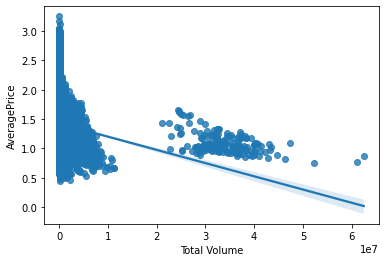

Relation between AveragePrice and 4046


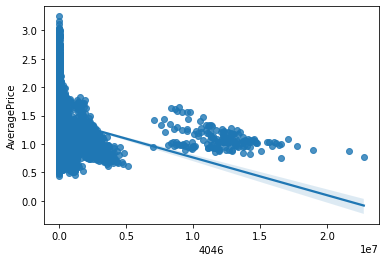

Relation between AveragePrice and 4225


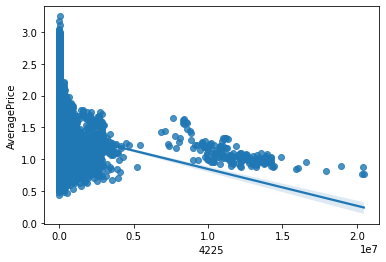

Relation between AveragePrice and 4770


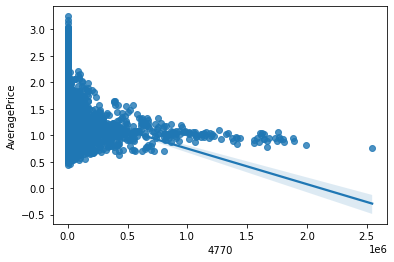

Relation between AveragePrice and Total Bags


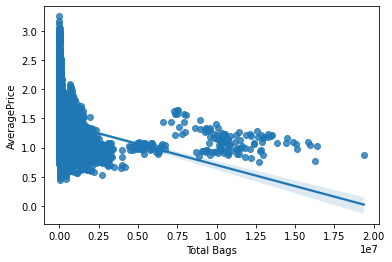

Relation between AveragePrice and Small Bags


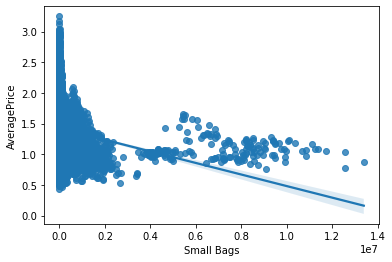

Relation between AveragePrice and Large Bags


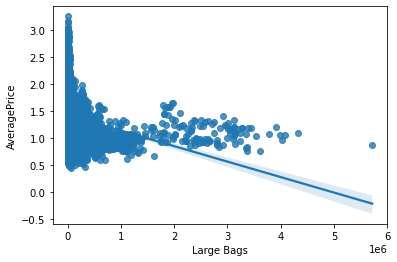

Relation between AveragePrice and XLarge Bags


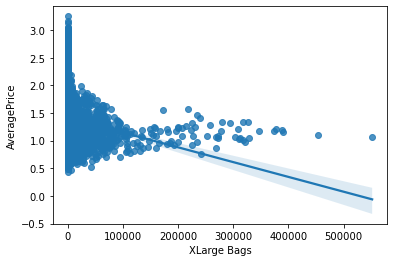

Relation between AveragePrice and year


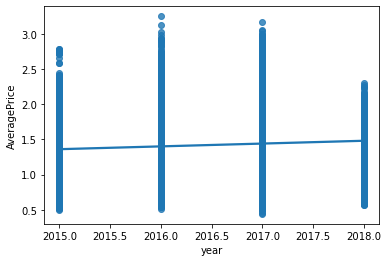

In [119]:
# we will use regplot to plot the graph
for i in num[2:]:
    print('Relation between AveragePrice and',i)
    plt.xlabel(i)
    plt.ylabel('AveragePrice')
    sns.regplot(avocado[i], avocado['AveragePrice'])
    plt.show()

From here we can see all independent features have negative correlation with the average price

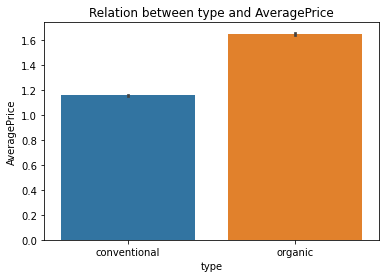

In [121]:
# let's check relation between categorical column and target variable
plt.title('Relation between type and AveragePrice')
plt.xlabel('type')
plt.ylabel('AveragePrice')
sns.barplot(avocado['type'], avocado['AveragePrice'])
plt.show()

Organic avocado have more average price than conventional

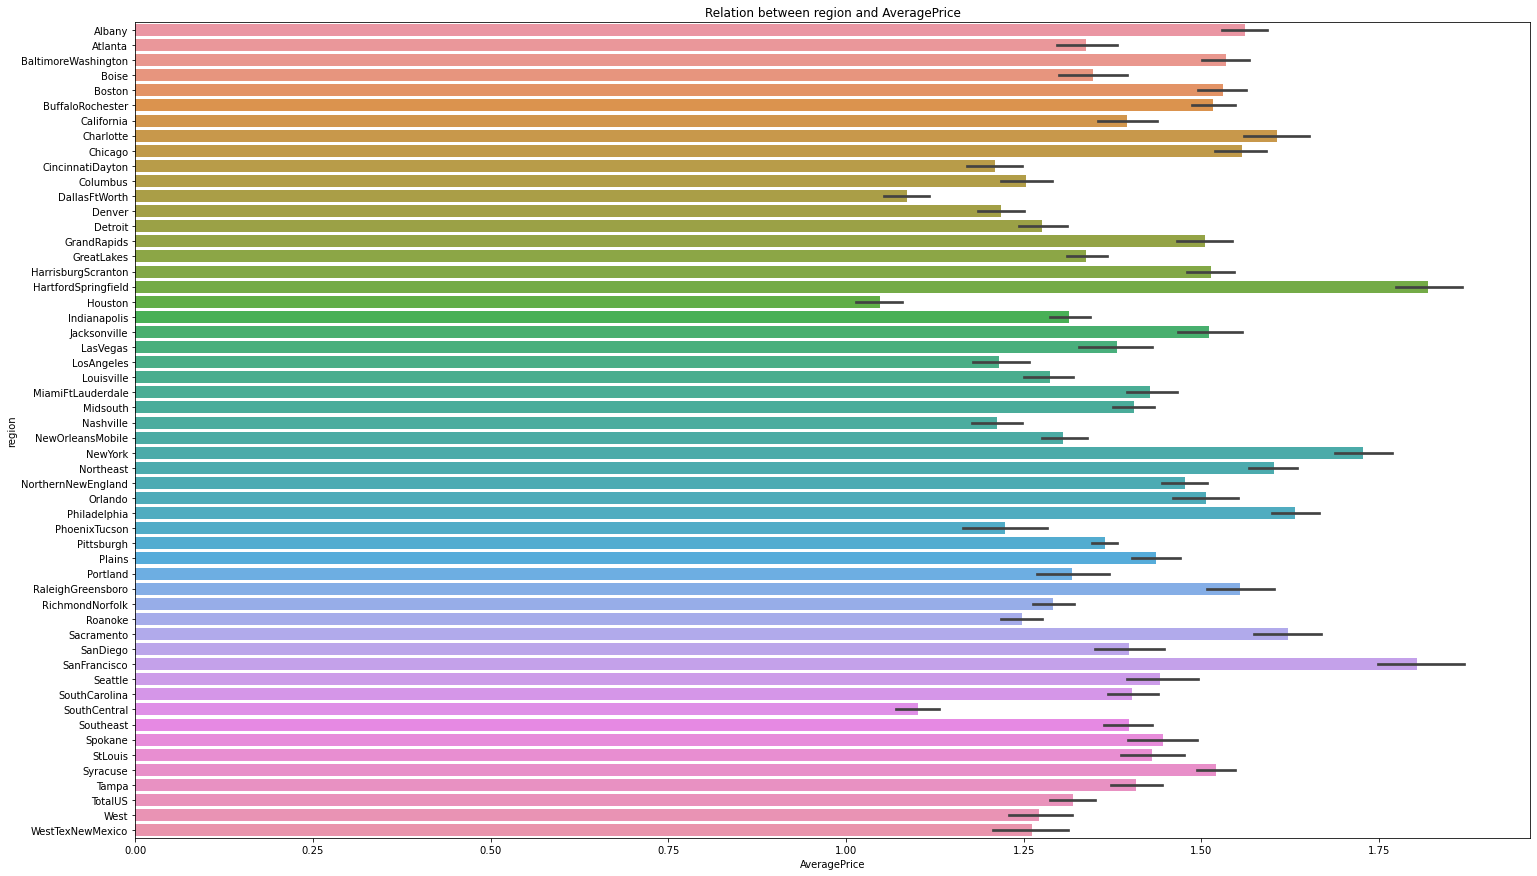

In [123]:
plt.figure(figsize = (25,15))
plt.title('Relation between region and AveragePrice')
plt.xlabel('AveragePrice')
plt.ylabel('region')
sns.barplot(avocado['AveragePrice'], avocado['region'])
plt.show()

The average price of avocado lies nearby 1.25 in all the regions.

### Feature Engineering

In [126]:
# first we will make a copy of our dataset and then we will perform all feature engineering part on them
copy_av = avocado.copy()

#### Dropping columns

First we will drop those columns which is not required or which is showing linear relationship with target variable and not providing much weightage to predict the output.

In [127]:
copy_av.drop('Unnamed: 0', axis = 1, inplace = True)
copy_av.drop('Date', axis = 1, inplace = True)
copy_av.drop('year', axis = 1, inplace = True)

In [128]:
# Checking shape of dataset
copy_av.shape

(18249, 11)

Three columns are dropped

#### Encoding

In [130]:
# importing required library
from sklearn.preprocessing import LabelEncoder

In [131]:
# making instance of it
le = LabelEncoder()

In [132]:
# as we know our two column contains categorical data so we will encode them into numerical values
copy_av['type'] = le.fit_transform(copy_av['type'])
copy_av['region'] = le.fit_transform(copy_av['region'])

In [133]:
# checking data types of our data
copy_av.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
region            int32
dtype: object

Every data is converted into numerical values.

#### Outliers

In [135]:
# importing library to calculate zscore
from scipy.stats import zscore

# calculating zscore
z = np.abs(zscore(copy_av))
z.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,0.999836,1.700252
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,0.999836,1.700252
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,0.999836,1.700252
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,0.999836,1.700252
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,0.999836,1.700252


In [136]:
# checking for other columns where zscore value is greater than 3 standard deviation
threshold = 3
np.where(z>threshold)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [137]:
# storing all values which have standard deviation less than 3 into another variable i.e. we are removing outliers
new_copy = copy_av[(z<threshold).all(axis = 1)]

# checking shape of new data
new_copy.shape

(17651, 11)

In [138]:
# Checking shape of old data
copy_av.shape

(18249, 11)

In [139]:
# checking data loss
data_loss = (((18249-17651)/18249)*100)
data_loss

3.276891884486821

Here we can see our data loss is around 3% and as compare to dataset it is acceptable.

#### Distribution of data

In [164]:
# first let's split input data and target data
in_x = newdf.iloc[ : , 1:]
out_y = newdf.iloc[ : , 0]

In [165]:
# As we have seen most columns have skewed data so we will handle them using log normal distribution
# let's make a list of all columns which have skewed data
data = in_x.iloc[ : , :-2]
# as we know last two columns we have encoded from categorical variable so we will take all data except last two

In [166]:
# we will use for loop to make them in log normal distribution
for i in data:
    in_x[i] = np.log(in_x[i])

In [167]:
in_x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,11.070329,6.943836,10.905127,3.874529,9.070718,9.059938,4.535284,-inf,0,0
1,10.912849,6.513645,10.706359,4.066117,9.159632,9.149323,4.579750,-inf,0,0
2,11.680304,6.677965,11.600475,4.871373,9.005202,8.992459,4.636087,-inf,0,0
3,11.277104,7.031741,11.184094,4.284689,8.667535,8.644249,4.896047,-inf,0,0
4,10.840357,6.847453,10.688265,4.327834,8.729713,8.697222,5.286700,-inf,0,0


Here as we can see XLarge Bags column have infinity values and it contains more than 60% to the whole data and if we will try to make them then those will contain same data type so we will drop this column.

In [168]:
in_x.drop('XLarge Bags', axis = 1, inplace = True)

There is some other columns which have infinity data type but these are less so we will handle them.

In [188]:
# we willl use maximum values to fill rest all column values
in_x[np.isinf(in_x)] = np.nanmax(in_x)

#### Multicollinearity

As we know there is multicollinearity exist in our dataset but we will not handle them because then we will left with very less data.

#### Scaling

In [173]:
# importing required library
from sklearn.preprocessing import StandardScaler

In [174]:
# making instance of it
sc = StandardScaler()

In [190]:
# sending input data for scaling and holding the scaled data into another variable
st = sc.fit_transform(in_x)

In [191]:
# now our data is scaled but it is in numpy array format so putting it into dataframe
input_x = pd.DataFrame(st)

### Now our data is ready to go for training

### Splitting data and training the model

In [195]:
# first we need to import required libraries
# for splitting the data into training and testing
from sklearn.model_selection import train_test_split

import sklearn   # this is machine learning library

# as this is a regression problem so importing some regression models for training then select the best model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# making an instance of models
lr = LinearRegression()
svr = SVR()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

# metrics for model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [199]:
# splitting data for training and testing
# we will use for loop to split data to select best random state
for i in range(40,61):
    x_train, x_test, y_train, y_test = train_test_split(input_x, out_y, test_size = 0.25, random_state = i)
    # this will split 75% data for training and 25% data for testing from random state 40 to 60 one by one
    
    knn.fit(x_train,y_train)
    # sending training data to the model one by one
    
    pred_train = knn.predict(x_train)
    # making predicting of training data
    
    pred_test = knn.predict(x_test)
    # making predicting of testing data
    
    print('At random state',i,'Training accuray is:',r2_score(y_train,pred_train))
    print('At random state',i,'Testing accuray is:',r2_score(y_test,pred_test), '\n')

At random state 40 Training accuray is: 0.8751275750293783
At random state 40 Testing accuray is: 0.8113865450719212 

At random state 41 Training accuray is: 0.8758933508357747
At random state 41 Testing accuray is: 0.8184120379531998 

At random state 42 Training accuray is: 0.8772039383082406
At random state 42 Testing accuray is: 0.796740044510862 

At random state 43 Training accuray is: 0.8761065793521979
At random state 43 Testing accuray is: 0.8112825254635592 

At random state 44 Training accuray is: 0.8765826826701411
At random state 44 Testing accuray is: 0.8104405626988053 

At random state 45 Training accuray is: 0.8751315057140805
At random state 45 Testing accuray is: 0.8117347661855276 

At random state 46 Training accuray is: 0.8764161693961519
At random state 46 Testing accuray is: 0.8166235585257964 

At random state 47 Training accuray is: 0.8788591824077432
At random state 47 Testing accuray is: 0.7964746502560355 

At random state 48 Training accuray is: 0.8762483

From here we can see there is not much difference into training and testing accuracy on different random states.

We will choose random state 41 to split our data

In [200]:
# splitting data into training and testing at random state 41
x_train, x_test, y_train, y_test = train_test_split(input_x, out_y, test_size = 0.25, random_state = 41)

In [201]:
# making a list of all models
models = [lr, svr, dt, knn]

# we will use for loop to train all models one by one and evaluate them
for model in models:
    # sending training data to the different models one by one
    model.fit(x_train,y_train)
    
    # making prediction
    pred = model.predict(x_test)
    
    # Evaluating the model
    print('Evaluation of', model, ':')
    print('r2_score:',r2_score(y_test, pred))
    print('Mean squared error:', mean_squared_error(y_test, pred))
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')

Evaluation of LinearRegression() :
r2_score: 0.4337501802839844
Mean squared error: 0.0833972552192154
Mean absolute error: 0.2276152119864047
Root mean squared error: 0.28878582932549757


Evaluation of SVR() :
r2_score: 0.6200244232082959
Mean squared error: 0.055962790717812315
Mean absolute error: 0.18003847312161161
Root mean squared error: 0.23656455930213283


Evaluation of DecisionTreeRegressor() :
r2_score: 0.6101708359013203
Mean squared error: 0.0574140267391797
Mean absolute error: 0.15901880806707455
Root mean squared error: 0.2396122424651539


Evaluation of KNeighborsRegressor() :
r2_score: 0.8184120379531998
Mean squared error: 0.026744269204622705
Mean absolute error: 0.11576931792431452
Root mean squared error: 0.16353675184686378




From here we can see that models SVR, Decision Tree and KNN have good r2 score and from them knn have highest r2 score that means it has good accuracy score. We will go with KNN model.

In [202]:
# let's train KNN model
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [203]:
pred_train = knn.predict(x_train)
# making predicting of training data
    
pred_test = knn.predict(x_test)
# making prediction of testing data

train_accuracy = r2_score(y_train, pred_train)
# checking training accuracy from r2 score

test_accuracy = r2_score(y_test, pred_test)
# checking testing accuracy from r2 score

print('Training accuracy is:', train_accuracy, 'and Testing accuracy is:', test_accuracy)

Training accuracy is: 0.8758933508357747 and Testing accuracy is: 0.8184120379531998


From here we can see there is very little i.e. around 0.06 difference between training accuracy and testing accuracy.

#### Cross Validation

In [204]:
# importing library
from sklearn.model_selection import cross_val_score

In [207]:
# we will use for loop to check cross validation score at different values
for i in range(3,10):
    score = cross_val_score(knn, input_x, out_y, cv = i)
    mean_score = score.mean()
    print('At Cross Fold', i, 'Cross validation score is:', mean_score,'\n')

At Cross Fold 3 Cross validation score is: -0.06313537195998813 

At Cross Fold 4 Cross validation score is: -0.29454746593575926 

At Cross Fold 5 Cross validation score is: -0.1143267408098376 

At Cross Fold 6 Cross validation score is: -0.08523226134168167 

At Cross Fold 7 Cross validation score is: 0.029103691119949086 

At Cross Fold 8 Cross validation score is: 0.023992841436259557 

At Cross Fold 9 Cross validation score is: 0.04461364872099397 



From here we can see there is not any benefit of cross validation of model.

[]

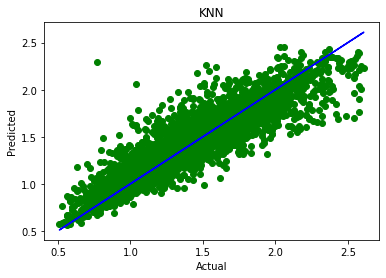

In [211]:
# Let's check how well our line is fitting to the test data
plt.scatter(x = y_test, y = pred_test, color = 'g')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN')
plt.plot()

This is our best fitted line and most data points are nearby to the line.

#### Regularization and hyperparameter tuning

In [212]:
# importing libraries
from sklearn.model_selection import GridSearchCV
# this is used to perform hyperparameter tuning

from sklearn.linear_model import Lasso
# we will use Lasso model for regularization

In [214]:
# making dictionary of different parameters to check the score for different parameters and find the best parameter
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1], 'random_state': list(range(10))}

# making instance of lasso
ls = Lasso()

# making instance to perform hyperparameter tuning
ht = GridSearchCV(ls, parameters)

# sending data to check best parameter
ht.fit(x_train, y_train)

# checking best parameter
print(ht.best_params_)

# checking best result
print('Best Score:', ht.best_score_)

{'alpha': 0.0001, 'random_state': 0}
Best Score: 0.42296886230896236


From here we can see lasso model does not have better score than knn

In [215]:
# let's do the hyperparameter tuning for model knn
params = {'n_neighbors':list(range(15)), 'weights':['uniform', 'distance'], 
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# making instance
hyp = GridSearchCV(knn, params)

# sending data for training
hyp.fit(x_train, y_train)

# checking best parameter
print('Best Parameters:', hyp.best_params_)

# checking best score
print('Best Score:', hyp.best_score_)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}
Best Score: 0.8080821799391924


From here we can see that it is also not giving the accuracy more than our model that we have trained. As our trained model is giving accuracy around 81% and it is giving 80% at best parameters.

So, after checking all these we will go with our trained model as it is giving us higher accuracy.

### Saving the best model

In [216]:
import joblib

In [217]:
joblib.dump(knn, 'Avocado_regression.obj')

['Avocado_regression.obj']

### Loading the model

In [218]:
pred_reg_ava = joblib.load('Avocado_regression.obj')

In [220]:
result = pred_reg_ava.score(x_test, y_test)
print('Result:', result*100)

Result: 81.84120379531998


Here we can see the model is providing 81% accuracy rate.

In [221]:
# Let's check and compare the predictions made by our model in dataframe
pd.DataFrame([pred_reg_ava.predict(x_test)[:], y_test[:]],index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,...,4403,4404,4405,4406,4407,4408,4409,4410,4411,4412
Predicted,1.23,1.154,1.642,1.606,1.232,1.618,1.678,1.276,1.166,1.134,...,1.318,1.554,1.156,1.958,1.302,0.952,1.362,1.786,0.918,1.508
Original,0.79,1.170,1.360,1.720,1.350,1.520,1.480,0.930,1.150,1.160,...,1.780,1.530,1.080,2.020,1.290,0.940,1.130,1.700,0.920,1.600


From here we can see the predicted average price by model is somewhere nearby for most of the data.